In [ ]:
#MUSIC GENERATION USING LSTM MODEL

In [37]:
#Importing Libraries
import tensorflow 
import numpy as np 
import pandas as pd 
from collections import Counter
import random
import IPython
from IPython.display import Image, Audio
import music21
from music21 import *
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adamax
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import sys
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
np.random.seed(42)

In [142]:
#Load the Dataset
df = pd.read_csv("emotion-dataset.csv")

In [143]:
#Structure of Database
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [144]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

In [145]:
!pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 3.4 MB/s eta 0:00:00


In [147]:
import neattext.functions as nfx
#Listing Methods and attributes if neattext
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [148]:
#Removing user handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [149]:
#Remove stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

In [150]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe.. hugggzzz u .! babe naamazed nga ako...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Attribute and Label
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

from sklearn.pipeline import Pipeline

pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

#Model fitting
pipe_lr.fit(Xfeatures,ylabels)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [152]:
pipe_lr.score(Xfeatures,ylabels)

0.8776442860427685

In [173]:
sample2 = "My dog died today. My health is not good"
emotion = pipe_lr.predict([sample2])
print(emotion)

['sadness']


In [38]:
import os
working_directory = os.getcwd()
print(working_directory)

/Users/varundesai/Desktop/MusicGenration


In [39]:
#Loading the list of chopin's midi files as stream 
filepath = working_directory + "/sadsongs/"
#Getting midi files
all_midis= []
for i in os.listdir(filepath):
    if i.endswith(".mid"):
        tr = filepath+i
        midi = converter.parse(tr)
        all_midis.append(midi)

In [40]:
#Helping function        
def extract_notes(file):
    notes = []
    pick = None
    for j in file:
        songs = instrument.partitionByInstrument(j)
        for part in songs.parts:
            pick = part.recurse()
            for element in pick:
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                elif isinstance(element, chord.Chord):
                    notes.append(".".join(str(n) for n in element.normalOrder))

    return notes
#Getting the list of notes as Corpus
Corpus= extract_notes(all_midis)
print("Total notes in all the Chopin midis in the dataset:", len(Corpus))

Total notes in all the Chopin midis in the dataset: 48602


In [41]:
print("First fifty values in the Corpus:", Corpus[:50])

First fifty values in the Corpus: ['5.9', 'F3', 'A6', '0', 'A3', '5.9', 'C4', '9.10', '4.5.9', 'A6', 'E3', '0', 'G3', '5.9', 'C4', '7.10', '2.5.9', 'D3', 'A6', '0', 'A3', 'D4', '5.9', '10', 'A3', '5.9', 'F4', 'A6', 'A3', '0', '5.9', '9.2', '9.0', '10.2.5', 'B-2', 'B-6', 'F3', '2', '5.10', 'D4', '0', 'F3', 'A2', 'B-6', '9.10.2.5', 'F3', '2', '5.10', 'D4', '0.5']


In [42]:
def chords_n_notes(Snippet):
    Melody = []
    offset = 0 #Incremental
    for i in Snippet:
        #If it is chord
        if ("." in i or i.isdigit()):
            chord_notes = i.split(".") #Seperating the notes in chord
            notes = [] 
            for j in chord_notes:
                inst_note=int(j)
                note_snip = note.Note(inst_note)            
                notes.append(note_snip)
                chord_snip = chord.Chord(notes)
                chord_snip.offset = offset
                Melody.append(chord_snip)
        # pattern is a note
        else: 
            note_snip = note.Note(i)
            note_snip.offset = offset
            Melody.append(note_snip)
        # increase offset each iteration so that notes do not stack
        offset += 1
    Melody_midi = stream.Stream(Melody)   
    return Melody_midi

Melody_Snippet = chords_n_notes(Corpus[:100])
print(Melody_Snippet)

<music21.stream.Stream 0x298d2ca90>


In [43]:
#Creating a count dictionary
count_num = Counter(Corpus)
print("Total unique notes in the Corpus:", len(count_num))

Total unique notes in the Corpus: 528


In [44]:
#Exploring the notes dictionary
Notes = list(count_num.keys())
Recurrence = list(count_num.values())
#Average recurrenc for a note in Corpus
def Average(lst):
    return sum(lst) / len(lst)
print("Average recurrenc for a note in Corpus:", Average(Recurrence))
print("Most frequent note in Corpus appeared:", max(Recurrence), "times")
print("Least frequent note in Corpus appeared:", min(Recurrence), "time")

Average recurrenc for a note in Corpus: 92.04924242424242
Most frequent note in Corpus appeared: 1460 times
Least frequent note in Corpus appeared: 1 time


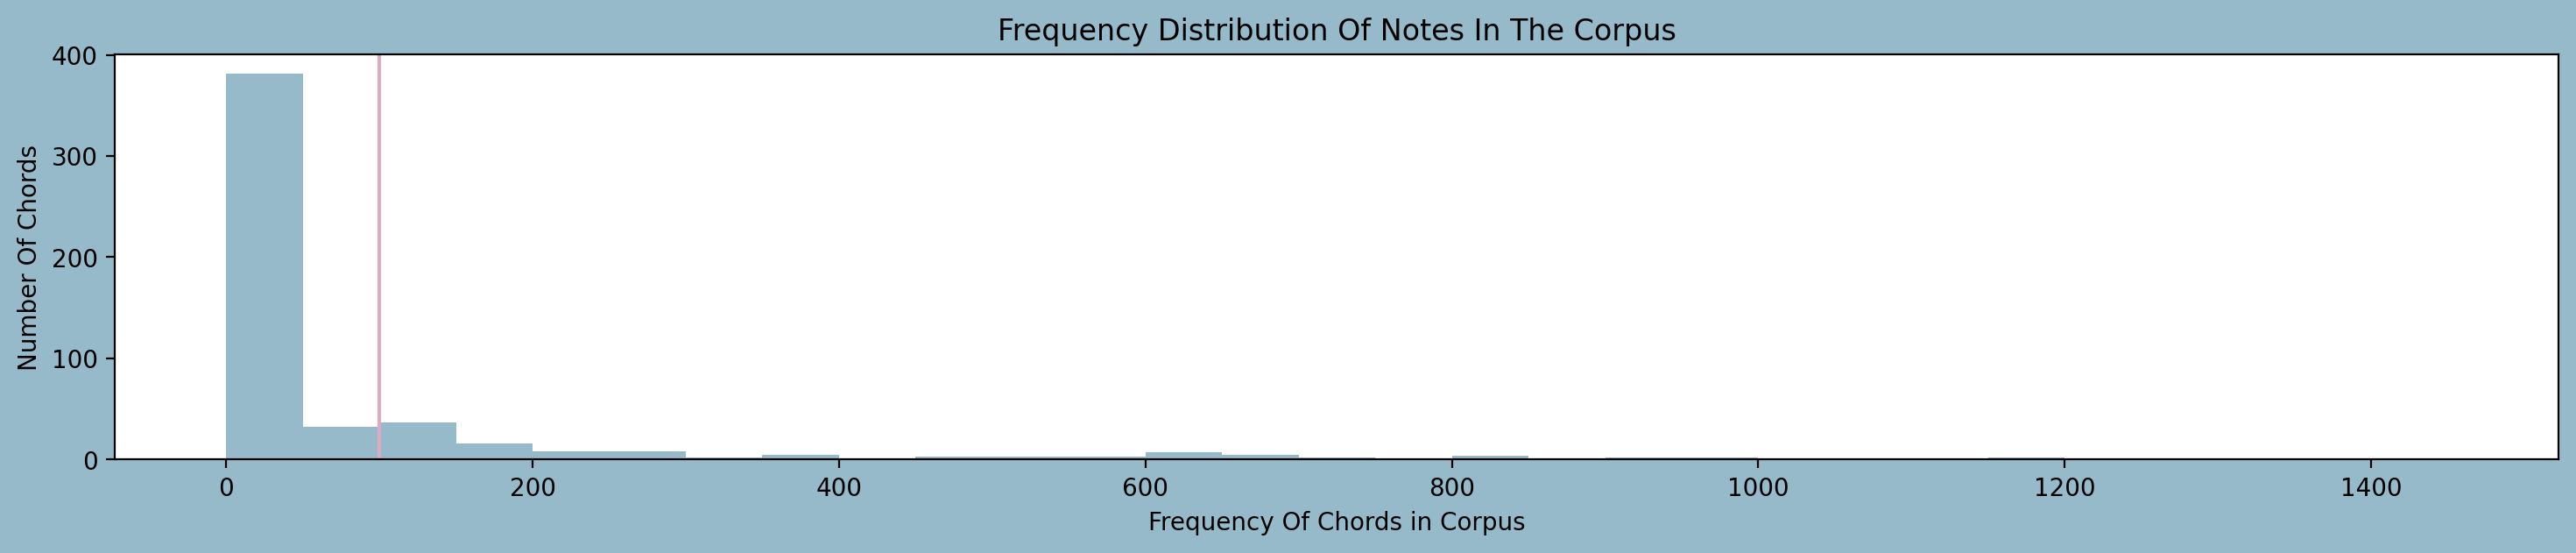

In [45]:
# Plotting the distribution of Notes
plt.figure(figsize=(18,3),facecolor="#97BACB")
bins = np.arange(0,(max(Recurrence)), 50) 
plt.hist(Recurrence, bins=bins, color="#97BACB")
plt.axvline(x=100,color="#DBACC1")
plt.title("Frequency Distribution Of Notes In The Corpus")
plt.xlabel("Frequency Of Chords in Corpus")
plt.ylabel("Number Of Chords")
plt.show()

In [48]:
#Getting a list of rare chords
rare_note = []
for index, (key, value) in enumerate(count_num.items()):
    if value < 20:
        m =  key
        rare_note.append(m)
        
print("Total number of notes that occur less than 100 times:", len(rare_note))

Total number of notes that occur less than 100 times: 322


In [49]:
#Eleminating the rare notes
for element in Corpus:
    if element in rare_note:
        Corpus.remove(element)

print("Length of Corpus after elemination the rare notes:", len(Corpus))

Length of Corpus after elemination the rare notes: 47524


In [50]:
# Storing all the unique characters present in my corpus to bult a mapping dic. 
symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus) #length of corpus
L_symb = len(symb) #length of total unique characters

#Building dictionary to access the vocabulary from indices and vice versa
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Total number of characters:", L_corpus)
print("Number of unique characters:", L_symb)

Total number of characters: 47524
Number of unique characters: 337


In [51]:
#Splitting the Corpus in equal length of strings and output target
length = 40
features = []
targets = []
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]
    target = Corpus[i + length]
    features.append([mapping[j] for j in feature])
    targets.append(mapping[target])
    
    
L_datapoints = len(targets)
print("Total number of sequences in the Corpus:", L_datapoints)

Total number of sequences in the Corpus: 47484


In [52]:
# reshape X and normalize
X = (np.reshape(features, (L_datapoints, length, 1)))/ float(L_symb)
# one hot encode the output variable
y = tensorflow.keras.utils.to_categorical(targets) 

In [53]:
#Taking out a subset of data to be used as seed
X_train, X_seed, y_train, y_seed = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
#Initialising the Model
model = Sequential()
#Adding layers
model.add(LSTM(512, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(256))
model.add(Dense(256))
model.add(Dropout(0.3))
model.add(Dense(y.shape[1], activation='softmax'))
# Compiling the model for training
opt = tensorflow.keras.optimizers.legacy.Adamax(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)

In [65]:
#Model's Summary               
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 40, 512)           1052672   
                                                                 
 dropout_13 (Dropout)        (None, 40, 512)           0         
                                                                 
 lstm_14 (LSTM)              (None, 256)               787456    
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 337)               86609     
                                                                 
Total params: 1992529 (7.60 MB)
Trainable params: 1992

In [66]:
#Training the Model
history = model.fit(X_train, y_train, batch_size=256, epochs=200)

Epoch 1/200
149/149 [==============================] - 66s 438ms/step - loss: 4.8833
Epoch 2/200
149/149 [==============================] - 66s 444ms/step - loss: 4.7311
Epoch 3/200
149/149 [==============================] - 70s 468ms/step - loss: 4.7142
Epoch 4/200
149/149 [==============================] - 76s 509ms/step - loss: 4.7092
Epoch 5/200
149/149 [==============================] - 89s 596ms/step - loss: 4.7019
Epoch 6/200
149/149 [==============================] - 88s 591ms/step - loss: 4.6954
Epoch 7/200
149/149 [==============================] - 87s 585ms/step - loss: 4.6911
Epoch 8/200
149/149 [==============================] - 87s 584ms/step - loss: 4.6886
Epoch 9/200
149/149 [==============================] - 94s 630ms/step - loss: 4.6834
Epoch 10/200
149/149 [==============================] - 98s 660ms/step - loss: 4.6838
Epoch 11/200
149/149 [==============================] - 103s 693ms/step - loss: 4.6807
Epoch 12/200
149/149 [==============================] - 107s 7

[Text(0.5, 0, 'Epochs')]

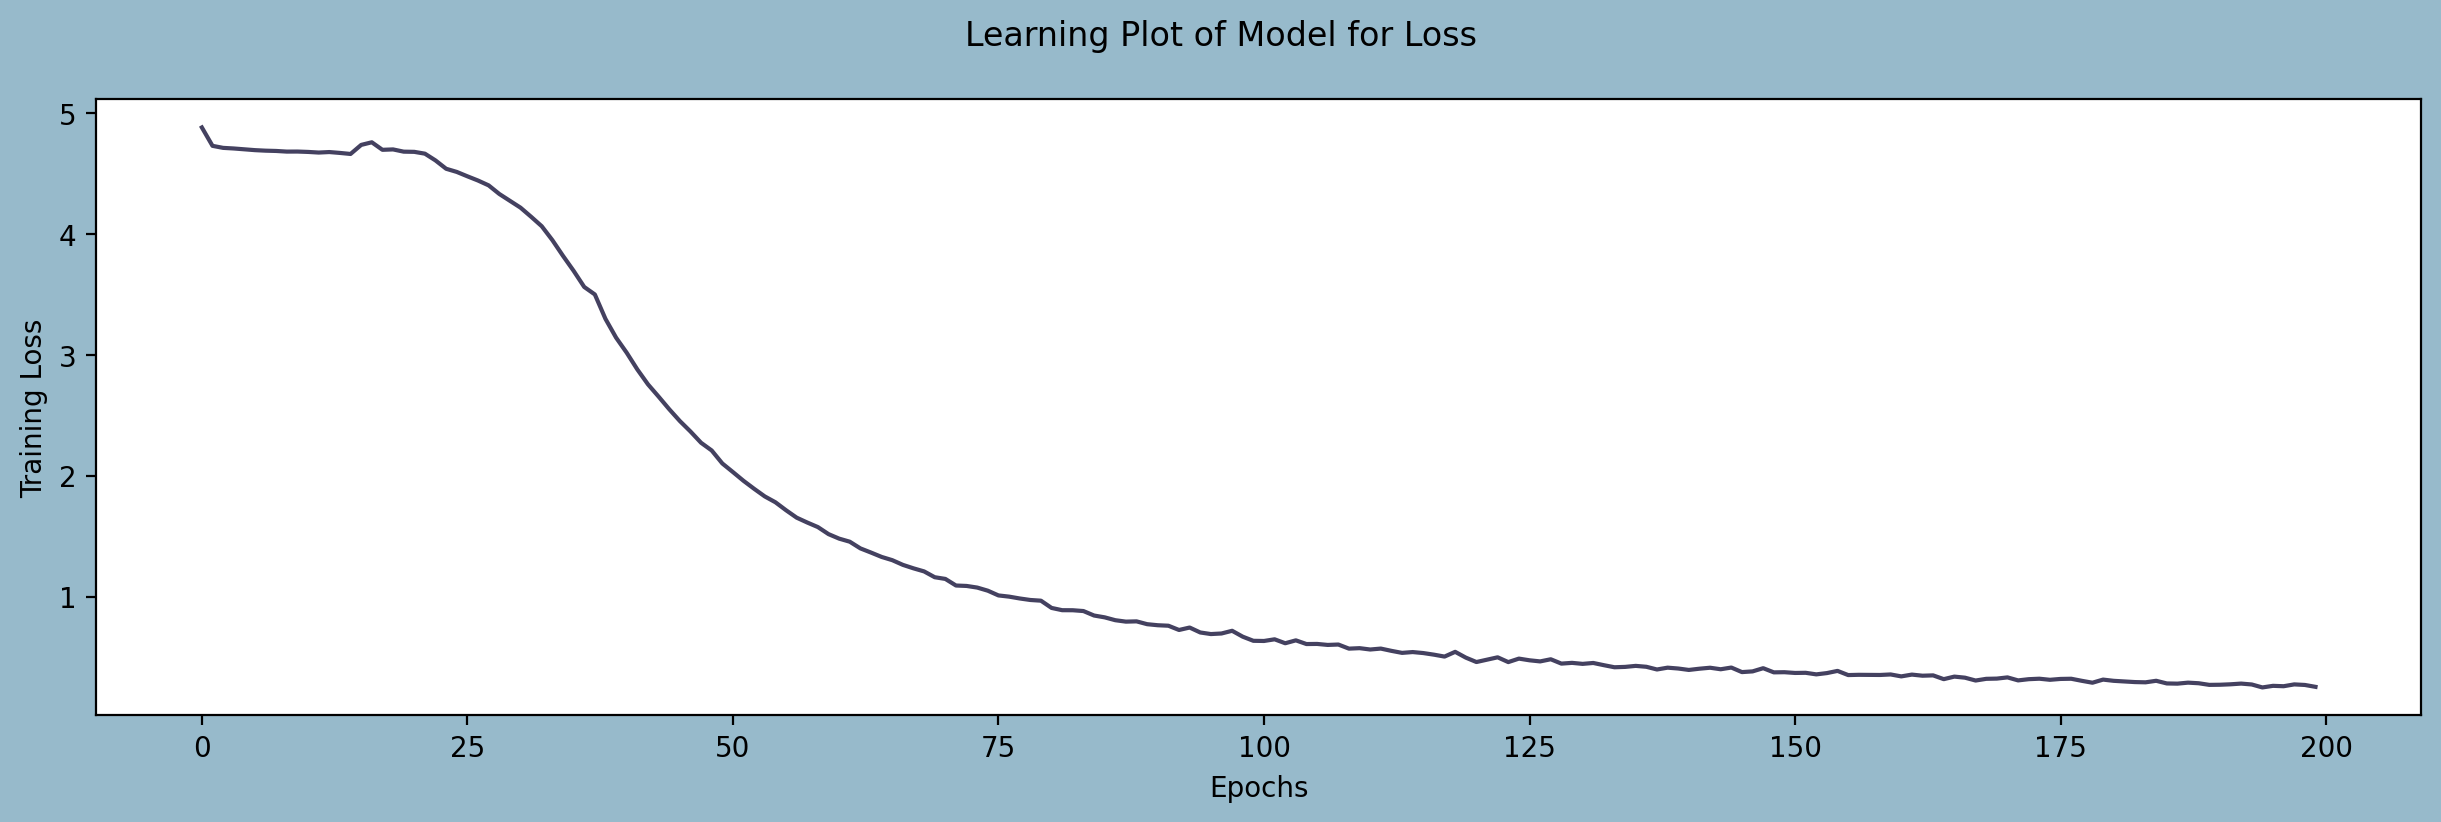

In [67]:
#Plotting the learnings 
history_df = pd.DataFrame(history.history)
fig = plt.figure(figsize=(15,4), facecolor="#97BACB")
fig.suptitle("Learning Plot of Model for Loss")
pl=sns.lineplot(data=history_df["loss"],color="#444160")
pl.set(ylabel ="Training Loss")
pl.set(xlabel ="Epochs")

In [132]:
!pip install midi2audio

In [134]:
!pip install pydub

In [178]:
if(emotion=='sadness'):
    #Harp instrument
    def Melody_Generator(Note_Count):
        # Set the desired MIDI program number for the flute (see https://en.wikipedia.org/wiki/General_MIDI#Program_change_events)
        harp_program_number = 46

        # Create a new instrument object for the flute
        harp_instrument = instrument.Harp()

        seed = X_seed[np.random.randint(0,len(X_seed)-1)]
        Music = ""
        Notes_Generated=[]
        for i in range(Note_Count):
            seed = seed.reshape(1,length,1)
            prediction = model.predict(seed, verbose=0)[0]
            prediction = np.log(prediction) / 2.0 #diversity
            exp_preds = np.exp(prediction)
            prediction = exp_preds / np.sum(exp_preds)
            index = np.argmax(prediction)
            index_N = index/ float(L_symb)   
            Notes_Generated.append(index)
            Music = [reverse_mapping[char] for char in Notes_Generated]
            seed = np.insert(seed[0],len(seed[0]),index_N)
            seed = seed[1:]
        #Now, we have music in form or a list of chords and notes and we want to be a midi file.
        Melody = chords_n_notes(Music)

        # Add the flute instrument to the MIDI stream
        Melody.insert(0, harp_instrument)

        # Set the MIDI program number for the flute
        for note in Melody.flat.notes:
            note.midiProgram = harp_program_number

        Melody_midi = stream.Stream(Melody)

        # Save the melody as a MIDI file
        filename = 'generated_music_harp.mid'
        path = os.path.join(os.getcwd(), filename)
        Melody_midi.write('midi', fp=path)

        return Music, Melody_midi


    # Generate the music and save it as a MIDI file
    Music_notes, Melody = Melody_Generator(200)
    print(Melody)
else:
    #Piano Instrument
    def Malody_Generator(Note_Count):
        seed = X_seed[np.random.randint(0,len(X_seed)-1)]
        Music = ""
        Notes_Generated=[]
        for i in range(Note_Count):
            seed = seed.reshape(1,length,1)
            prediction = model.predict(seed, verbose=0)[0]
            prediction = np.log(prediction) / 3.0 #diversity
            exp_preds = np.exp(prediction)
            prediction = exp_preds / np.sum(exp_preds)
            index = np.argmax(prediction)
            index_N = index/ float(L_symb)   
            Notes_Generated.append(index)
            Music = [reverse_mapping[char] for char in Notes_Generated]
            seed = np.insert(seed[0],len(seed[0]),index_N)
            seed = seed[1:]
        #Now, we have music in form or a list of chords and notes and we want to be a midi file.
        Melody = chords_n_notes(Music)
        Melody_midi = stream.Stream(Melody)

        # Save the melody as a MIDI file
        filename = 'generated_music_piano.mid'
        path = os.path.join(os.getcwd(), filename)
        Melody_midi.write('midi', fp=path)

        return Music, Melody_midi


    # Generate the music and save it as a MIDI file
    Music_notes, Melody = Malody_Generator(100)
    print(Melody)

<music21.stream.Stream 0x1563fcc40>
